### Load Library

In [1]:
import pandas as pd
import numpy as np
import psycopg2
import base64
from IPython.display import Image

/Users/choic3/anaconda3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


### Connect GPDB

####  <font color='red'> *Change your connection info </font>

In [2]:
conn = psycopg2.connect("dbname='cbjazz' user='gpadmin' password='changeme' host='mdw' port=5432")

### Draw Chart on GPDB

In [3]:
sql = """
SELECT home_project.py_bar_chart(X, Y, 
    'Stock Price', 
    legend, 
    NULL, 
    opt) chart
FROM (
SELECT string_agg(s_close::text, ',' order by s_date) Y,
    string_agg((s_date - '2017-01-01'::date)::text, ',' order by s_date) X,
    string_agg(code, ',' order by s_date) legend,
    '{
    \"style\":\"bmh\", 
    \"figure.figsize\": [13.0, 6.0], 
    \"legend.loc\":\"upper right\",
    \"lines.marker\":\"o\",
    \"axes.color_pallete\": [\"#ED553B\", \"#20639B\", \"#3CAEA3\", \"#F6D55C\"],
    \"axes.color_alpha\":0.7
    }' opt
FROM stock.price
WHERE code IN ('013700.KS', '013360.KS', '044380.KS')
    AND s_date >= '2017-11-01' AND s_date < '2017-12-01'
) as a;
"""

In [4]:
cur = conn.cursor()
cur.execute(sql)
rows = cur.fetchall()
cur.close()

In [5]:
conn.close()

###  Draw Chart

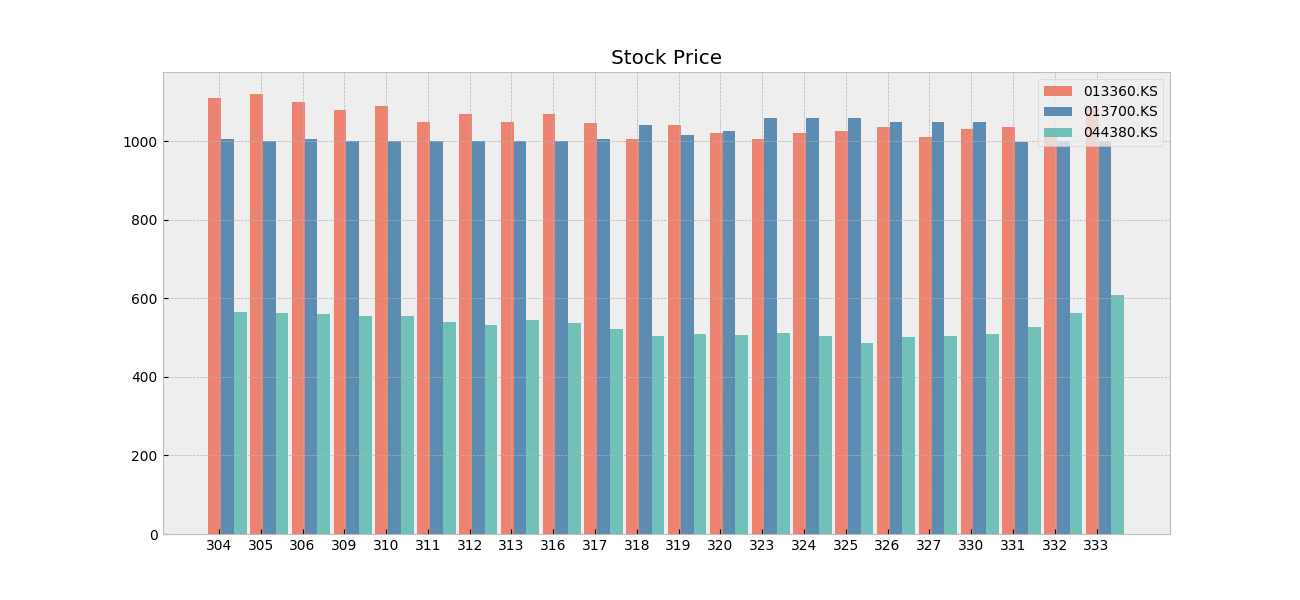

In [6]:
image = base64.b64decode(rows[0][0])
Image(image)